In [31]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [32]:
import pandas as pd


In [37]:
import glob
directory = "/data/MCMC/"
files = sorted( glob.glob(directory + "par*.bin"), 
                key=lambda x:int(x.split("/")[-1][3:].split('_')[0]))
bins = []
for line in open("/data/MCMC/metadata.txt","r"):
    tag = line.split()[0].split("_")
    if tag[0] == "bin": bins.append(float(line.split()[1]))
bins = np.array(bins)

In [28]:
import struct

data = {}
for fname in files:
    with open(fname, "rb") as f: 
        size = int(struct.unpack('<i', f.read(4))[0])
        data[fname] = np.fromfile(f,np.float32)
data = pd.DataFrame(data)[files]

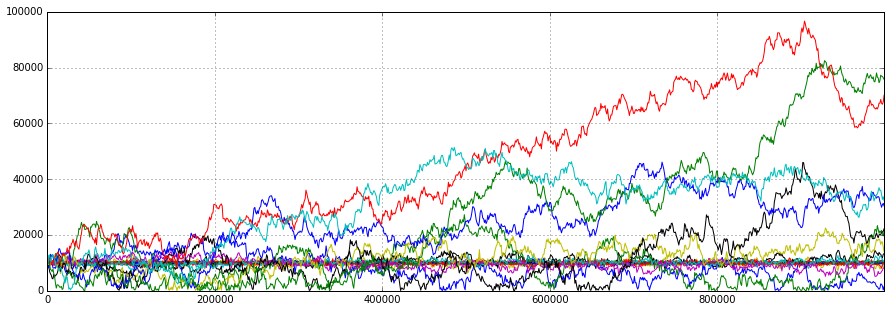

In [29]:
figsize(15,5)
data.iloc[::1000].plot(legend=False)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 32 Text xticklabel objects>)

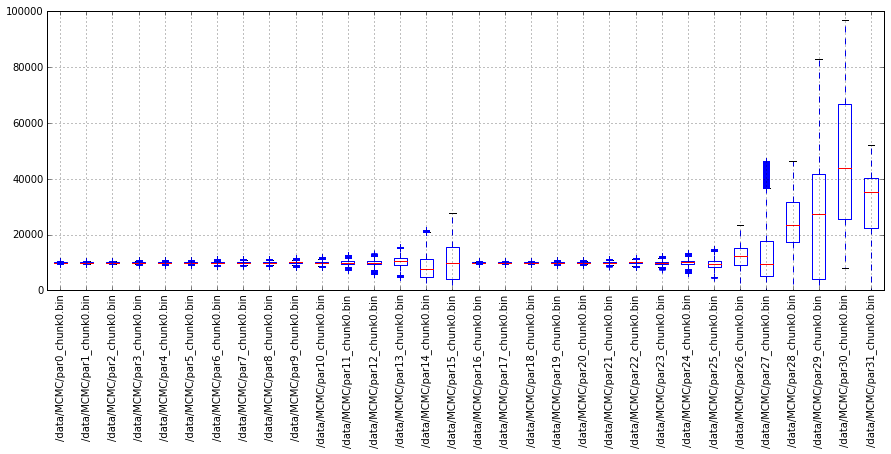

In [30]:
figsize(15,5)
data.boxplot();
xticks(rotation='vertical')